In [24]:
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence
from keras.utils import np_utils

import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

In [25]:
# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.set_random_seed(seed)

In [26]:
# 로이터 뉴스 데이터셋을 불러오고 불러온 데이터를 학습셋과 테스트셋으로 나누기
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)

In [27]:
# 데이터 확인하기
category = numpy.max(Y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])
Y_train

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


array([ 3,  4,  3, ..., 25,  3, 25])

In [28]:
# 데이터 전처리
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)

# Y-Data 원-핫 인코딩
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

In [29]:
# 모델 설정
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

In [30]:
# 모델 컴파일
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [31]:
# 모델의 실행
history = model.fit(x_train, y_train, batch_size=100, epochs=20, validation_data=(x_test, y_test))

Train on 8982 samples, validate on 2246 samples
Epoch 1/20
8982/8982 [==============================] - 19s 2ms/step - loss: 2.6201 - acc: 0.3438 - val_loss: 2.4223 - val_acc: 0.3620
Epoch 2/20
8982/8982 [==============================] - 18s 2ms/step - loss: 2.3199 - acc: 0.3880 - val_loss: 2.0556 - val_acc: 0.4951
Epoch 3/20
8982/8982 [==============================] - 18s 2ms/step - loss: 1.9605 - acc: 0.5026 - val_loss: 1.9183 - val_acc: 0.5303
Epoch 4/20
8982/8982 [==============================] - 17s 2ms/step - loss: 1.7583 - acc: 0.5509 - val_loss: 1.7325 - val_acc: 0.5623
Epoch 5/20
8982/8982 [==============================] - 18s 2ms/step - loss: 1.6607 - acc: 0.5766 - val_loss: 1.6614 - val_acc: 0.5868
Epoch 6/20
8982/8982 [==============================] - 18s 2ms/step - loss: 1.5653 - acc: 0.6000 - val_loss: 1.5581 - val_acc: 0.6126
Epoch 7/20
8982/8982 [==============================] - 18s 2ms/step - loss: 1.4560 - acc: 0.6308 - val_loss: 1.5239 - val_acc: 0.6202
Epoch 8

In [32]:
# 테스트 정확도
print("Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

2246/2246 [==============================] - 2s 877us/step
Test Accuracy: 0.7217


In [33]:
# 테스트셋 오차
y_vloss = history.history['val_loss']

In [34]:
# 학습셋 오차
y_loss = history.history['loss']

Text(0, 0.5, 'loss')

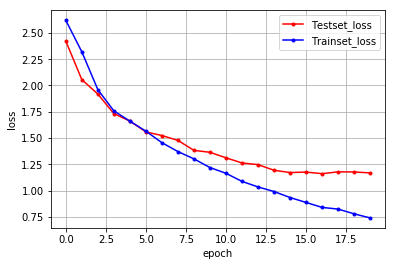

In [35]:
# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

# 그리드를 그리고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')